<a href="https://colab.research.google.com/github/parkjy0629/tensorflow_study/blob/main/tensorflow_python/myimg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 로딩
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
!wget -q https://raw.githubusercontent.com/parkjy0629/tensorflow_study/main/study_csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [8]:
# 이미지 읽어서 데이터 준비
paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
i_var = np.array([plt.imread(paths[i]) for i in range(len(paths))])
d_var = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(i_var.shape, d_var.shape)

i_var = i_var.reshape(18724, 28, 28, 1)
d_var = pd.get_dummies(d_var)
print(i_var.shape, d_var.shape)

(18724, 28, 28) (18724,)
(18724, 28, 28, 1) (18724, 10)


In [11]:
d_var[0:10]

,A,B,C,D,E,F,G,H,I,J
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,True,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False


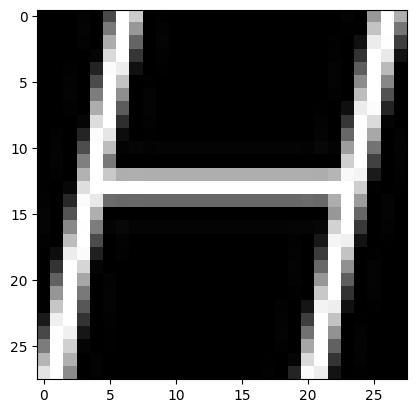

In [15]:
plt.imshow(i_var[1], cmap='gray')

In [9]:
# 모델 완성
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# 모델 학습
model.fit(i_var, d_var, epochs=10)

Epoch 1/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7587 - loss: 0.7944
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9083 - loss: 0.3021
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9296 - loss: 0.2292
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9439 - loss: 0.1802
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9526 - loss: 0.1503
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9595 - loss: 0.1280
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9670 - loss: 0.1045
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9701 - loss: 0.0942
Epoch 9/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9763 - loss: 0.0733
Epoch 10/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9806 - loss: 0.0608


In [16]:
# 모델 이용
pred = model.predict(i_var[0:5])
pd.DataFrame(pred).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# 정답 확인
d_var[0:5]

,A,B,C,D,E,F,G,H,I,J
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True


In [18]:
# 모델 확인
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,414 (482.09 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,708 (241.05 KB)